# Libraries

In [ ]:
# Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Decision Tree
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Logistic regression + Perceptron method
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Outlier detection + PCA with hierarchical clustering + Random Forest
from sklearn import preprocessing
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn import tree
warnings.simplefilter(action='ignore', category=FutureWarning)

# SVM + PCA
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Part 1

## 1.1 Data Analysis

### Data pre-processing

In [ ]:
# Importing and reading data.
data = pd.read_csv('Dataset.csv')
print(data)

       Unnamed: 0  instant        date  ... Subscribed  Non-subscribed Total
0               0        1  2011-01-01  ...          3              13    16
1               1        2  2011-01-01  ...          8              32    40
2               2        3  2011-01-01  ...          5              27    32
3               3        4  2011-01-01  ...          3              10    13
4               4        5  2011-01-01  ...          0               1     1
...           ...      ...         ...  ...        ...             ...   ...
17374       17374    17375  2012-12-31  ...         11             108   119
17375       17375    17376  2012-12-31  ...          8              81    89
17376       17376    17377  2012-12-31  ...          7              83    90
17377       17377    17378  2012-12-31  ...         13              48    61
17378       17378    17379  2012-12-31  ...         12              37    49

[17379 rows x 16 columns]


In [ ]:
data.head()

,Unnamed: 0,instant,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
0,0,1,2011-01-01,winter,0,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,1,2,2011-01-01,winter,0,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2,3,2011-01-01,winter,0,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,5,27,32
3,3,4,2011-01-01,winter,0,Jan,3,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,3,10,13
4,4,5,2011-01-01,winter,0,Jan,4,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,0,1,1


In [ ]:
# Drop unnecessary attributes
data = data.drop(columns="Unnamed: 0")
data = data.drop(columns="instant")
data = data.drop(columns="date")
data.tail()

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
17374,winter,1,Dec,19,Mon,Mist,4.22,1.0016,60.0,11.0014,11,108,119
17375,winter,1,Dec,20,Mon,Mist,4.22,1.0016,60.0,11.0014,8,81,89
17376,winter,1,Dec,21,Mon,Clear or partly cloudy,4.22,1.0016,60.0,11.0014,7,83,90
17377,winter,1,Dec,22,Mon,Clear or partly cloudy,4.22,1.9982,56.0,8.9981,13,48,61
17378,winter,1,Dec,23,Mon,Clear or partly cloudy,4.22,1.9982,65.0,8.9981,12,37,49


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Checking the type of data.
data.dtypes

season                  object
year                     int64
month                   object
hour                     int64
weekday                 object
weather                 object
temperature            float64
feeling_temperature    float64
humidity               float64
windspeed              float64
Subscribed               int64
Non-subscribed           int64
Total                    int64
dtype: object

In [ ]:
# Checking the distribution of the data and types of the variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               17379 non-null  object 
 1   year                 17379 non-null  int64  
 2   month                17379 non-null  object 
 3   hour                 17379 non-null  int64  
 4   weekday              17379 non-null  object 
 5   weather              17379 non-null  object 
 6   temperature          17379 non-null  float64
 7   feeling_temperature  17379 non-null  float64
 8   humidity             17379 non-null  float64
 9   windspeed            17379 non-null  float64
 10  Subscribed           17379 non-null  int64  
 11  Non-subscribed       17379 non-null  int64  
 12  Total                17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


In [ ]:
# Check unique season values
data["season"].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [ ]:
# Convert the categorical values to numerical values
# Better for visualization
data["season"].replace({
    'winter':0,
    'spring':1,
    'summer':2,
    'fall':3
},inplace=True)

In [ ]:
# Check unique weather values
data["weather"].unique()

array(['Clear or partly cloudy', 'Mist', 'Light rain', 'Heavy rain'],
      dtype=object)

In [ ]:
# Convert the categorical values to numerical values
# Better for visualization
data["weather"].replace({
    'Clear or partly cloudy':0,
    'Mist':1,
    'Light rain':2,
    'Heavy rain':3
},inplace=True)

In [ ]:
# Check unique weekday values
data["weekday"].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [ ]:
# Convert the categorical values to numerical values
# Better for visualization
data["weekday"].replace({
    'Sat':5,
    'Sun':6,
    'Mon':0,
    'Tue':1,
    'Wed':2,
    'Thu':3,
    'Fri':4
 },inplace=True)

In [ ]:
data.temperature = data.temperature.apply(lambda v:(v-data.temperature.min())/
                                          (data.temperature.max()-
                                           data.temperature.min()))

In [ ]:
data.feeling_temperature = data.feeling_temperature.apply(lambda v:
                                (v-data.feeling_temperature.min())/
                                (data.feeling_temperature.max()-
                                 data.feeling_temperature.min()))

In [ ]:
data.humidity = data.humidity.apply(lambda v:(v-data.humidity.min())/
                                    (data.humidity.max()-data.humidity.min()))

In [ ]:
data.windspeed = data.windspeed.apply(lambda v:(v-data.windspeed.min())/
                                     (data.windspeed.max()-data.windspeed.min()))

In [ ]:
data.tail()

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
17374,0,1,Dec,19,0,1,0.244898,0.2576,0.60,0.193018,11,108,119
17375,0,1,Dec,20,0,1,0.244898,0.2576,0.60,0.193018,8,81,89
17376,0,1,Dec,21,0,0,0.244898,0.2576,0.60,0.193018,7,83,90
17377,0,1,Dec,22,0,0,0.244898,0.2727,0.56,0.157870,13,48,61
17378,0,1,Dec,23,0,0,0.244898,0.2727,0.65,0.157870,12,37,49


In [ ]:
# Checking data after processing.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               17379 non-null  int64  
 1   year                 17379 non-null  int64  
 2   month                17379 non-null  object 
 3   hour                 17379 non-null  int64  
 4   weekday              17379 non-null  int64  
 5   weather              17379 non-null  int64  
 6   temperature          17379 non-null  float64
 7   feeling_temperature  17379 non-null  float64
 8   humidity             17379 non-null  float64
 9   windspeed            17379 non-null  float64
 10  Subscribed           17379 non-null  int64  
 11  Non-subscribed       17379 non-null  int64  
 12  Total                17379 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [ ]:
# Describe data
data.describe()

,season,year,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,1.501640,0.502561,11.546752,3.011451,0.425283,0.486722,0.475775,0.627229,0.223460,35.676218,153.786869,189.463088
std,1.106918,0.500008,6.914405,2.001966,0.639357,0.196486,0.171850,0.192930,0.143811,49.305030,151.357286,181.387599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,6.000000,1.000000,0.000000,0.326531,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000
50%,2.000000,1.000000,12.000000,3.000000,0.000000,0.489796,0.484800,0.630000,0.228047,17.000000,115.000000,142.000000
75%,2.000000,1.000000,18.000000,5.000000,1.000000,0.653061,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000
max,3.000000,1.000000,23.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


In [ ]:
# Checking the correlation with pre-processed data file
new_data = data
new_data.corr()

,season,year,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
season,1.000000,-0.010742,-0.006117,-0.007448,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,-0.010742,1.000000,-0.003867,0.000977,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hour,-0.006117,-0.003867,1.000000,-0.002893,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
weekday,-0.007448,0.000977,-0.002893,1.000000,-0.046424,-0.036220,-0.038918,-0.035233,0.003274,0.241964,-0.086415,-0.006338
weather,-0.014524,-0.019157,-0.020203,-0.046424,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temperature,0.312025,0.040913,0.137603,-0.036220,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
feeling_temperature,0.319380,0.039222,0.133750,-0.038918,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.150625,-0.083546,-0.276498,-0.035233,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.149773,-0.008740,0.137252,0.003274,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
Subscribed,0.120206,0.142779,0.301202,0.241964,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


### Visualizations

#### Heatmap for the correlation of the data set

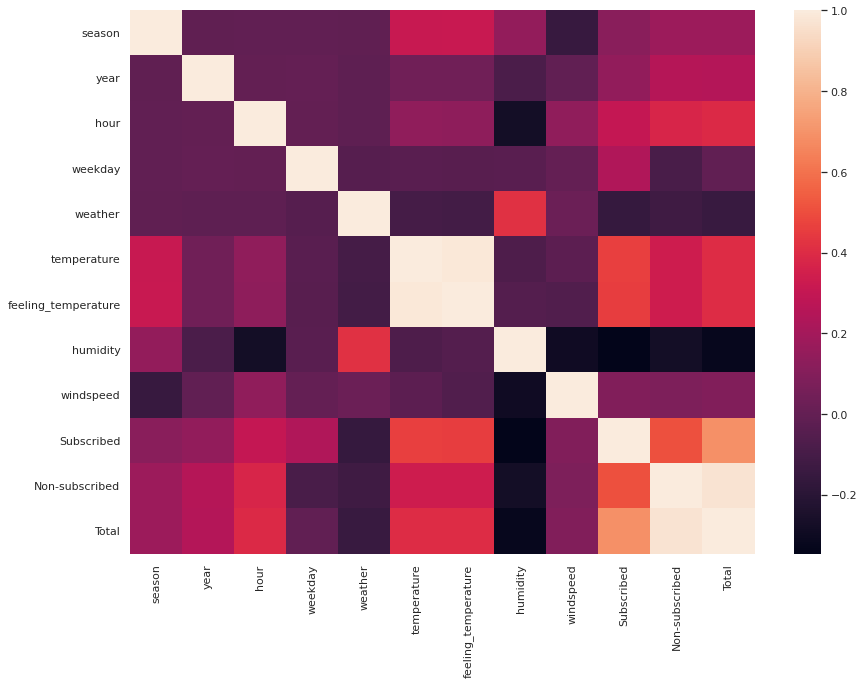

In [ ]:
sns.heatmap(new_data.corr())
sns.set(rc={'figure.figsize':(14,10)})

In [ ]:
# Checking correlation with 'subscribed' coloumn.
new_data.corr()["Subscribed"].sort_values(ascending=False)

Subscribed             1.000000
Total                  0.694564
Non-subscribed         0.506618
temperature            0.459616
feeling_temperature    0.454080
hour                   0.301202
weekday                0.241964
year                   0.142779
season                 0.120206
windspeed              0.090287
weather               -0.152628
humidity              -0.347028
Name: Subscribed, dtype: float64

In [ ]:
# Checking correlation with 'weather' coloumn.
new_data.corr()["humidity"].sort_values(ascending=False)

humidity               1.000000
weather                0.418130
season                 0.150625
weekday               -0.035233
feeling_temperature   -0.051918
temperature           -0.069881
year                  -0.083546
Non-subscribed        -0.273933
hour                  -0.276498
windspeed             -0.290105
Total                 -0.322911
Subscribed            -0.347028
Name: humidity, dtype: float64

#### Distribution of the target attributes

In [ ]:
nd = new_data[['Subscribed', 'Non-subscribed', 'Total']]

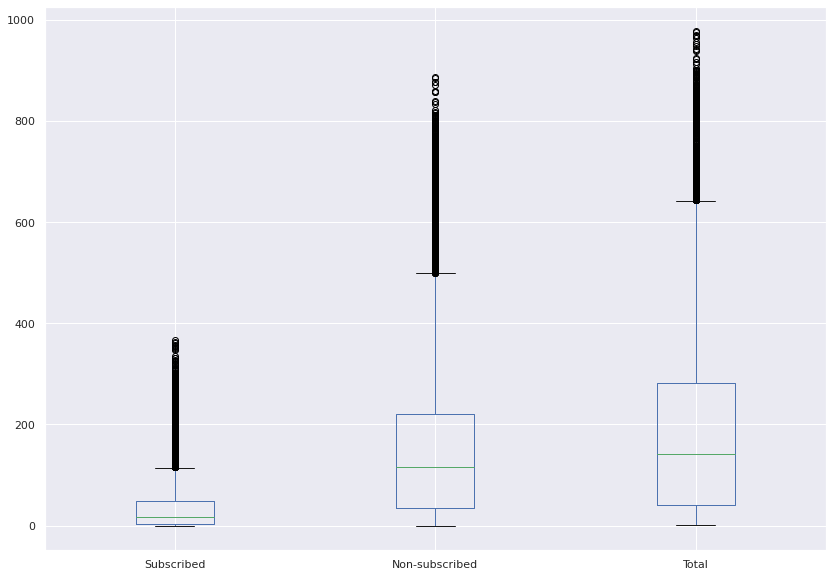

In [ ]:
nd.plot.box()

#### Scatter matrix for the data set

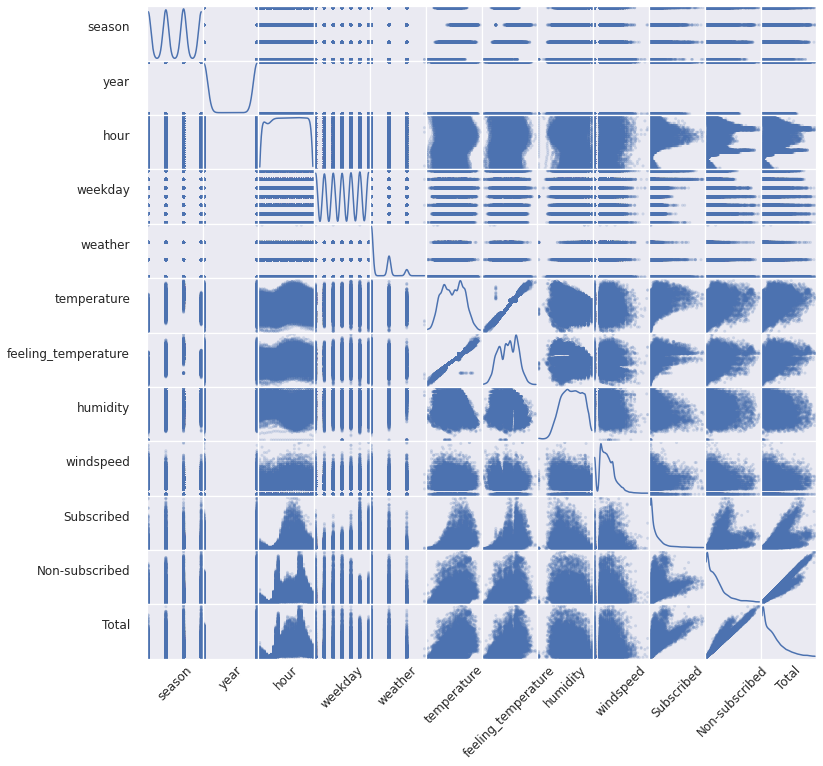

In [ ]:
sm = pd.plotting.scatter_matrix(new_data, alpha=0.2, figsize=(12,12), diagonal='kde')

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_ha('right') for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

#### Bar plot for season-based monthly distribution

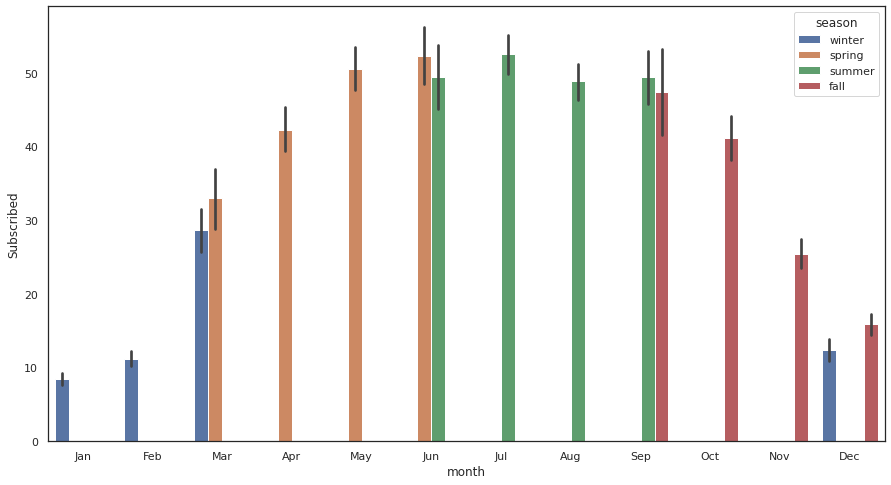

In [ ]:
# Subscribed users
new_data["season"].replace({
    0: 'winter',
    1: 'spring',
    2: 'summer',
    3: 'fall'
},inplace=True)

fig, ax = plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='Subscribed',
            data=new_data[['month','Subscribed','season']],hue='season',ax=ax)
plt.show()

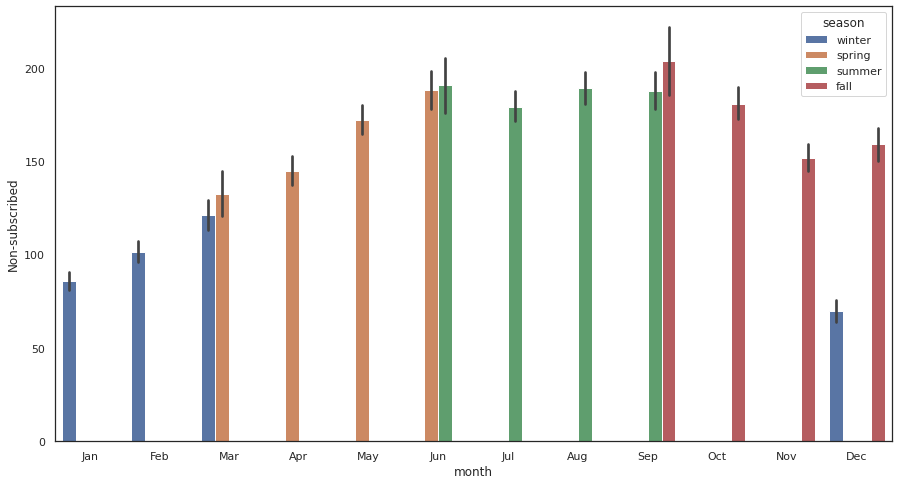

In [ ]:
# Non-subscribed users
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='Non-subscribed',
            data=new_data[['month','Non-subscribed','season']],hue='season',ax=ax)
plt.show()

#### Bar plot for weekday-based monthly distribution

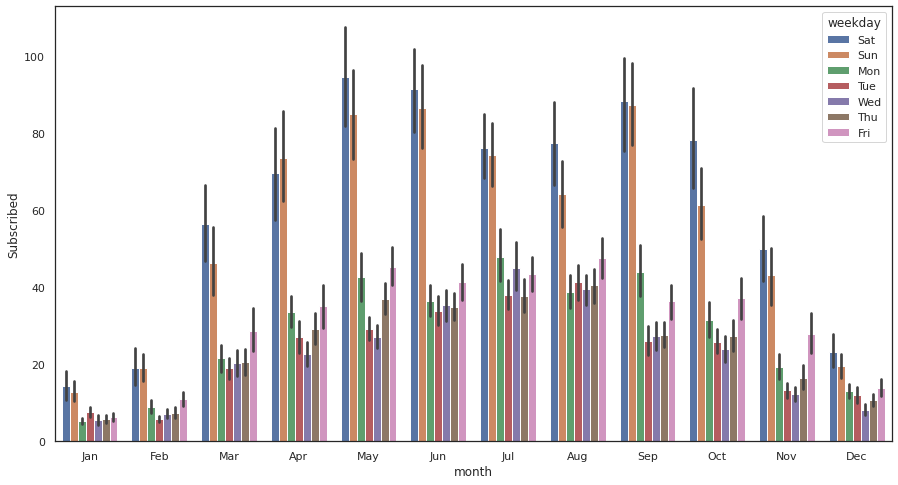

In [ ]:
# Subscribed users
new_data["weekday"].replace({
    5:'Sat',
    6:'Sun',
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri'
},inplace=True)

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Subscribed',
            data=new_data[['month','Subscribed','weekday']],hue='weekday',ax=ax1)
plt.show()

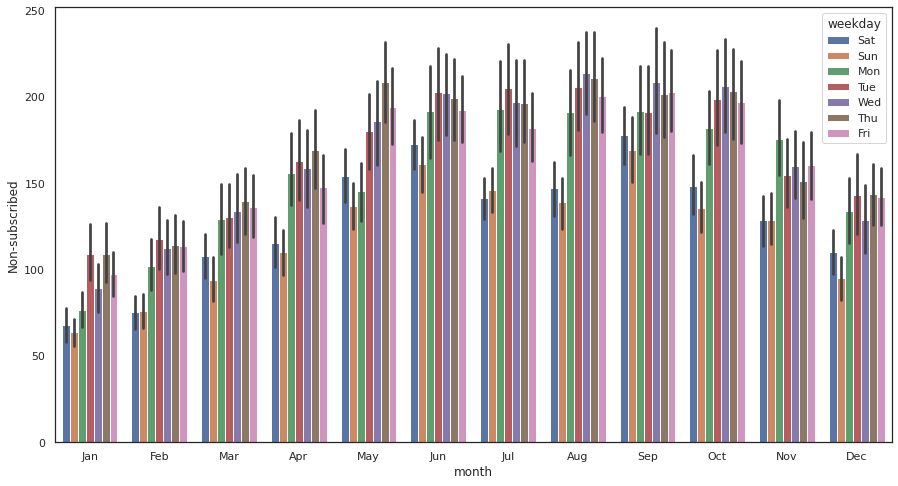

In [ ]:
# Non-subscribed users
fig, ax1 =plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Non-subscribed',
            data=new_data[['month','Non-subscribed','weekday']],hue='weekday',ax=ax1)
plt.show()

#### Bar plot for weekday distribution

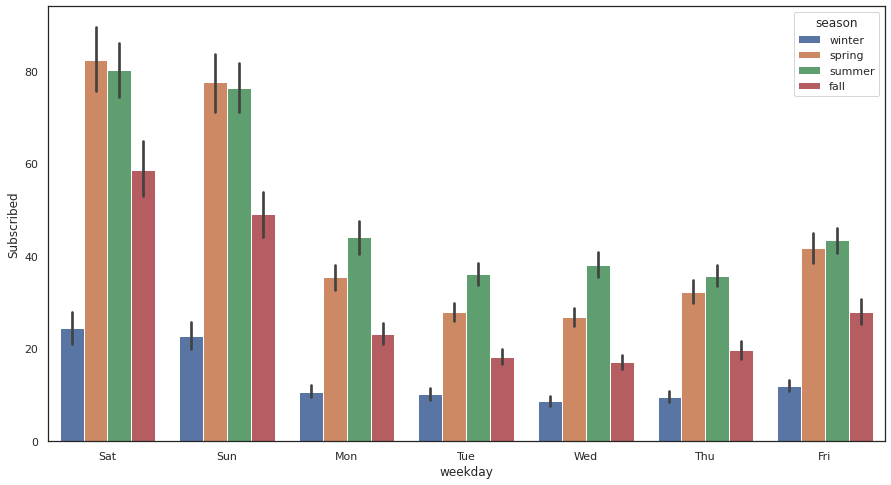

In [ ]:
# Subscribed users
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=new_data,x='weekday',y='Subscribed',hue='season')
plt.show()

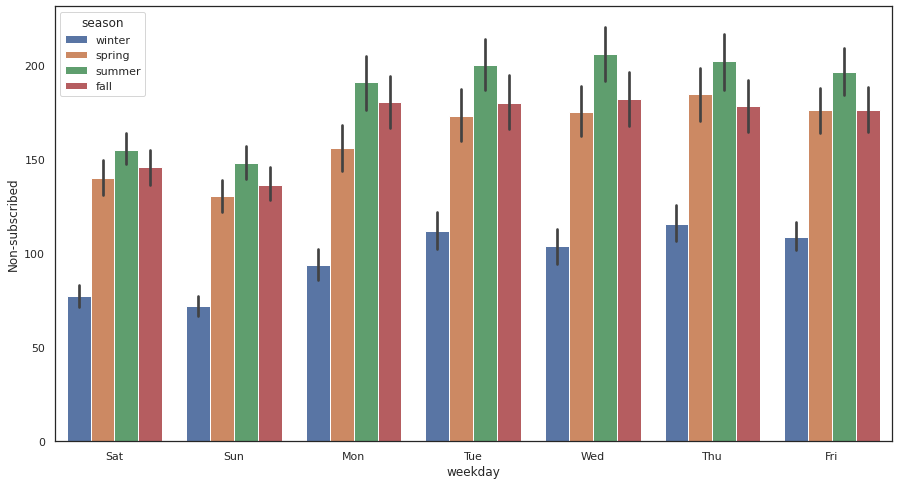

In [ ]:
# Non-subscribed users
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=new_data,x='weekday',y='Non-subscribed',hue='season')
plt.show()

#### Bar plot for weather_condition distribution

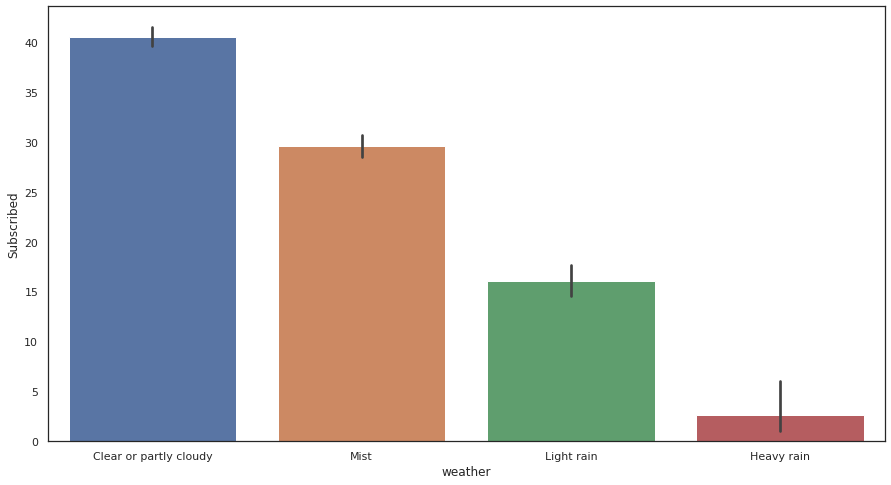

In [ ]:
# Subscribed users
new_data["weather"].replace({
    0:'Clear or partly cloudy',
    1:'Mist',
    2:'Light rain',
    3:'Heavy rain'
},inplace=True)

fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(x='weather',y='Subscribed',
            data=new_data[['month','Subscribed','weather']],ax=ax1)
plt.show()

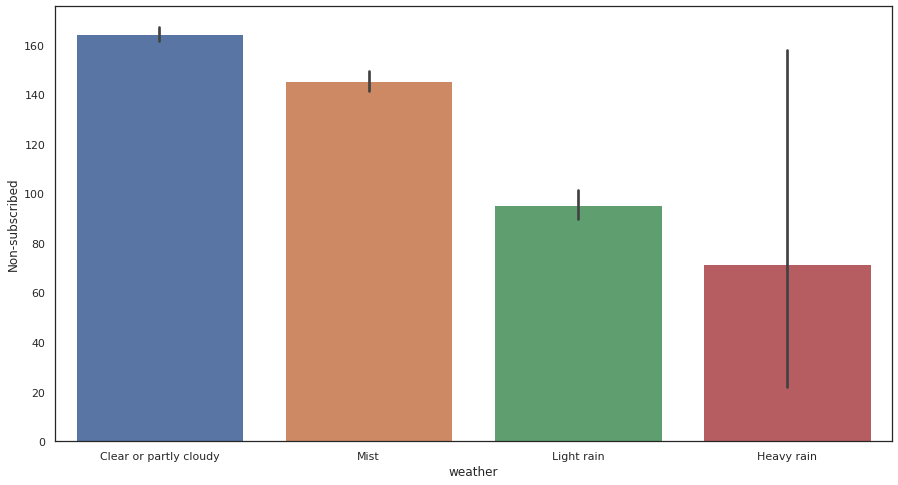

In [ ]:
# Non-subscribed users
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(x='weather',y='Non-subscribed',
            data=new_data[['month','Non-subscribed','weather']],ax=ax1)
plt.show()

## 1.2 Linear Regression

### Data pre-processing

In [ ]:
# Read the data set into a data frame.
df = pd.read_csv("Dataset.csv")

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "Subscribed",
                      "Non-subscribed"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather"])
df = pd.concat([df, df2], axis=1)

### Performance of the model on the test set using different training size

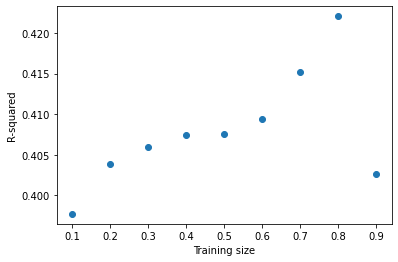

In [ ]:
# Dictionary to store the R-squared performance of each training size.
performance = {}
# Target attribute.
y = df['Total'].values
# Features.
X = df.drop(['Total'], axis=1).values

# For each training size, train the model on the training set and evaluate
# the peformance of the model on the test set using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size,
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

# Plot the R-squared performances of each training size in one plot.
plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

### Experiment with different transformations of the target

#### Transformation 1: MinMaxScaler()

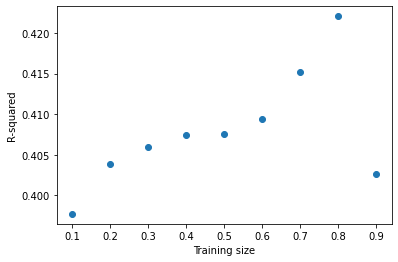

In [ ]:
# Standardization of the target by scaling the target into the range (0, 1).

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Tranformation of the target.
transformer = MinMaxScaler()
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, train_size=size,
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

# Plot the performances of each training size in one plot.
plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

#### Transformation 2: PowerTransformer()

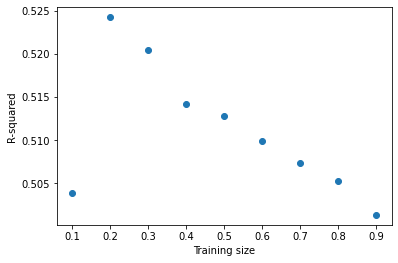

In [ ]:
# Mapping the target to a Gaussian distribution in order to stabilize variance
# and minimize skewness.

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Transformation of the target.
transformer = PowerTransformer()
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=size,
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

#### Transformation 3: QuartileTransformer()

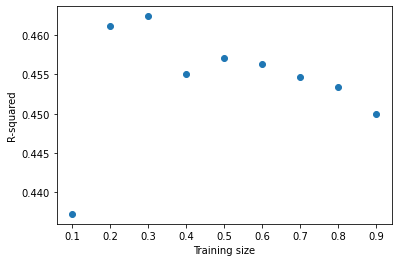

In [ ]:
# QuantileTransformer provides a non-parametric transformation to map the data
# to a uniform distribution with values between 0 and 1.

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Transformation of the target.
transformer = QuantileTransformer(output_distribution='normal')
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=size,
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

## 1.3 Decision Tree Regression

### Data pre-processing

In [ ]:
# Load data.
bike_rent_df = pd.read_csv('Dataset.csv')

In [ ]:
bike_rent_df.shape

(17379, 16)

In [ ]:
# Outliers Replacement.
col_name = ['humidity','windspeed']
outlier_df = pd.DataFrame(bike_rent_df, columns=(col_name))

for c in col_name:
  # 75%.
  per_75 = np.percentile(outlier_df.loc[:,c],75)
  # 25%.
  per_25 = np.percentile(outlier_df.loc[:,c],25)
  # Range.
  range_per = per_75 - per_25
  min_per = per_75 - (range_per * 1.5)
  max_per = per_25 + (range_per * 1.5)
  # Outlier -> NAN.
  outlier_df.loc[outlier_df.loc[:,c]<min_per, :c] = np.nan
  outlier_df.loc[outlier_df.loc[:,c]>max_per, :c] = np.nan
  # Replace outliers with the mean.
  outlier_df['humidity'] = outlier_df['humidity'].fillna(outlier_df['humidity'].mean())
  outlier_df['windspeed'] = outlier_df['windspeed'].fillna(outlier_df['windspeed'].mean())

In [ ]:
# Replace the original data with data that removes outlier.
bike_rent_df['windspeed'] = bike_rent_df['windspeed'].replace(outlier_df['windspeed'])
bike_rent_df['humidity'] = bike_rent_df['humidity'].replace(outlier_df['humidity'])

In [ ]:
# Split the dataset with ratio 7:3.
# For Subscribed.
X_train_Sub, X_test_Sub, Y_train_Sub, Y_test_Sub = train_test_split(bike_rent_df.iloc[:,0:-3], bike_rent_df.iloc[:,-3],test_size=0.3,random_state=4)
# For non-Subscribed.
X_train_no, X_test_no, Y_train_no, Y_test_no = train_test_split(bike_rent_df.iloc[:,0:-3], bike_rent_df.iloc[:,-2],test_size=0.3,random_state=4)

In [ ]:
print(X_train_Sub.shape, X_test_Sub.shape, Y_train_Sub.shape, Y_test_Sub.shape)

(12165, 13) (5214, 13) (12165,) (5214,)


In [ ]:
# Drop unrelated column.
train_x_Sub_clean = X_train_Sub[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
train_x_no_clean = X_train_no[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
test_x_Sub_clean = X_test_Sub[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
test_x_no_clean = X_test_no[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
train_x_Sub_clean.head(1)

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed
13590,summer,1,Jul,11,Wed,Clear or partly cloudy,27.72,28.0022,81.0,12.228966


In [ ]:
# One-hot-encoding categorical features.
cat_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather']
# Subscribed.
train_x_sub = pd.get_dummies(train_x_Sub_clean, columns=cat_features)
train_y_sub = Y_train_Sub.values
test_x_sub = pd.get_dummies(test_x_Sub_clean, columns=cat_features)
test_y_sub = Y_test_Sub.values
# Non-subscribed.
train_x_nosub = pd.get_dummies(train_x_no_clean, columns=cat_features)
train_y_nosub = Y_train_no.values
test_x_nosub = pd.get_dummies(test_x_no_clean, columns=cat_features)
test_y_nosub = Y_test_no.values
train_x_sub.shape

(12165, 57)

In [ ]:
train_x_sub.head(3)

,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,year_0,year_1,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
13590,27.72,28.0022,81.000000,12.228966,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1823,17.38,18.0032,63.713304,16.997900,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
14404,24.90,28.0022,51.000000,11.001400,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Build regression decision tree for subscribed and find the most impact parameter

In [ ]:
# Baseline.
DTR_base = DecisionTreeRegressor(random_state=42)
DTR_base.fit(train_x_sub, train_y_sub)
DTR_pred = DTR_base.predict(test_x_sub)
baseline_rmse = math.sqrt(metrics.mean_squared_error(test_y_sub, DTR_pred))
print("baseline RMSE:", baseline_rmse)

baseline RMSE: 30.756333529327616


In [ ]:
# Set hyperparametric domain.
criterions = ['mse','mae']
splitters = ['best','random']
max_features_sub = list(range(1,train_x_sub.shape[1]))
max_features_nosub = list(range(1,train_x_nosub.shape[1]))
max_depths = np.linspace(10, 100, 10, endpoint=True)
min_samples_splits = list(range(2,20))
min_samples_leafs = list(range(1,10))
min_weight_fraction_leafs = np.linspace(0, 0.5, 6, endpoint=True)
max_leaf_nodess = list(range(50,1000,50))
min_impurity_decrease = np.linspace(0.1, 1, 10, endpoint=True)

In [ ]:
def best_para(DTR, train_x, train_y, test_x, test_y):
  DTR.fit(train_x, train_y)
  DTR_pred = DTR.predict(test_x)
  rmse = math.sqrt(metrics.mean_squared_error(test_y, DTR_pred))
  return rmse

def find_index(paralist, rmselist):
  min_val = min(rmselist)
  max_val = max(rmselist)
  rmse_range = max_val - min_val
  index_min = rmselist.index(min_val)
  para_val = paralist[index_min]
  print(rmselist)
  print("best paramter is: "+ str(para_val) +" with rmse = "+ str(min_val))
  print("range of variation of RMSE: ", rmse_range)

#### Parameter: criterion

In [ ]:
# criterions = ['mse','mae']
best_criterions = []
for c in criterions:
  DTR = DecisionTreeRegressor(criterion = c, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_criterions.append(rmse)
find_index(criterions, best_criterions)

[30.756333529327616, 28.96062628728965]
best paramter is: mae with rmse = 28.96062628728965
range of variation of RMSE:  1.7957072420379667


#### Parameter: splitter

In [ ]:
# splitters = ['best','random']
best_splitters = []
for s in splitters:
  DTR = DecisionTreeRegressor(splitter = s, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_splitters.append(rmse)
find_index(splitters, best_splitters)

[30.756333529327616, 28.271116734698108]
best paramter is: random with rmse = 28.271116734698108
range of variation of RMSE:  2.4852167946295083


#### Parameter: max_future

In [ ]:
# max_features_sub = list(range(1,train_x_sub.shape[1]))
best_max_features_sub = []
for mb in max_features_sub:
  DTR = DecisionTreeRegressor(max_features= mb, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_features_sub.append(rmse)
find_index(max_features_sub, best_max_features_sub)

[41.0765357523382, 40.07734179884789, 37.97849120247025, 35.55143237724252, 32.435970090850695, 32.13814228369796, 35.64547616782949, 30.590983256783378, 32.07363581964502, 33.09066902156243, 30.954081462495456, 32.62844994890621, 32.22153132512392, 31.66111735439676, 29.00144501247586, 30.88211574488875, 30.9648683591118, 30.89177999640641, 30.221782814746817, 31.523306202057984, 29.403261445958314, 29.328804910332682, 30.983964262613775, 30.86320151115597, 32.405237167120184, 31.573463266833173, 30.289838229373917, 29.341193545340523, 30.290034516721267, 31.10656109986952, 29.97508874934755, 31.609503652151904, 30.341728574748682, 30.132195791961617, 31.510421221710452, 30.7693114551847, 30.725740911877338, 29.55299570338195, 31.631123937260444, 30.906689193452152, 29.760600223478022, 32.05917883304523, 31.14973366134927, 29.98443209415856, 30.11688328819922, 29.35967646662305, 29.36597962768603, 30.98541114579868, 30.85265414418504, 31.62598784258861, 29.95762254329422, 30.354190319

#### Parameter: max_depth

In [ ]:
# max_depths = np.linspace(10, 100, 10, endpoint=True)
best_max_depth = []
for md in max_depths:
  DTR = DecisionTreeRegressor(max_depth = md, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_depth.append(rmse)
find_index(max_depths, best_max_depth)

[32.708502503356556, 30.250039999783194, 30.27718217184644, 31.347499233423544, 30.756333529327616, 30.756333529327616, 30.756333529327616, 30.756333529327616, 30.756333529327616, 30.756333529327616]
best paramter is: 20.0 with rmse = 30.250039999783194
range of variation of RMSE:  2.4584625035733616


#### Parameter: min_samples_split

In [ ]:
# min_samples_splits = list(range(2,20))
best_min_samples_split = []
for mss in min_samples_splits:
  DTR = DecisionTreeRegressor(min_samples_split = mss, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_samples_split.append(rmse)
find_index(min_samples_splits, best_min_samples_split)

[30.756333529327616, 30.98742274277349, 29.792284069646612, 29.673360537836032, 29.73607322505803, 29.405219818861685, 29.603589252332554, 28.557911079183278, 27.77433992510508, 27.860759413869197, 27.57764301994495, 27.320299704501455, 27.5840776060689, 27.62225295123463, 27.64146633594669, 27.459627817254777, 27.649356249035083, 27.579523535055944]
best paramter is: 13 with rmse = 27.320299704501455
range of variation of RMSE:  3.6671230382720346


#### Parameter: min_samples_leaf

In [ ]:
# min_samples_leafs = list(range(1,10))
best_min_samples_leaf = []
for msl in min_samples_leafs:
  DTR = DecisionTreeRegressor(min_samples_leaf = msl, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_samples_leaf.append(rmse)
find_index(min_samples_leafs, best_min_samples_leaf)

[30.756333529327616, 29.281636137362206, 27.914141853395723, 26.904953764239153, 26.606427070543624, 26.69750027464798, 26.821830766330162, 27.11314131704876, 27.020069951658254]
best paramter is: 5 with rmse = 26.606427070543624
range of variation of RMSE:  4.149906458783992


#### Parameter: min_weight_fraction_leaf

In [ ]:
# min_weight_fraction_leafs = np.linspace(0, 0.5, 6, endpoint=True)
best_min_weight_fraction_leafs = []
for bmw in min_weight_fraction_leafs:
  DTR = DecisionTreeRegressor(min_weight_fraction_leaf = bmw, random_state=42)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_weight_fraction_leafs.append(rmse)
find_index(min_weight_fraction_leafs, best_min_weight_fraction_leafs)

[30.756333529327616, 41.98034784862461, 42.82241660913512, 43.252664678960215, 45.36699249012264, 49.09931912342388]
best paramter is: 0.0 with rmse = 30.756333529327616
range of variation of RMSE:  18.342985594096266


####Parameter: max_leaf_nodes

In [ ]:
# max_leaf_nodess = list(range(50,1000,50))
best_max_leaf_nodess = []
for mln in max_leaf_nodess:
  DTR = DecisionTreeRegressor(max_leaf_nodes = mln,random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_leaf_nodess.append(rmse)
find_index(max_leaf_nodess, best_max_leaf_nodess)

[31.958501220901802, 30.31983750649112, 29.909912355691517, 29.13907884698948, 29.221941078932925, 29.2747558563752, 29.377243423113388, 29.403516927634765, 29.24358437827414, 29.25865941657914, 29.306181166343062, 29.43307784533855, 29.507181344397686, 29.495202317155698, 29.67534404380201, 29.656200372972545, 29.685894508399038, 29.74553596001204, 29.72311121620464]
best paramter is: 200 with rmse = 29.13907884698948
range of variation of RMSE:  2.819422373912321


####Parameter: min_impurity_decrease

In [ ]:
# min_impurity_decrease = np.linspace(0.1, 1, 10, endpoint=True)
best_min_impurity_decrease = []
for mid in min_impurity_decrease:
  DTR = DecisionTreeRegressor(min_impurity_decrease = mid, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_impurity_decrease.append(rmse)
find_index(min_impurity_decrease, best_min_impurity_decrease)

[29.628552457374575, 29.311877932128773, 29.72519432635501, 29.245512034900095, 29.420472833253417, 29.31946442027514, 29.860041584625375, 29.618535051791003, 29.539859857416594, 29.868755686034234]
best paramter is: 0.4 with rmse = 29.245512034900095
range of variation of RMSE:  0.623243651134139


####The parameter which has the most impact on the test performance is : *min_samples_leaf*

In [ ]:
# for train set
train_best_min_samples_leafs = []
for t in min_samples_leafs:
  DTR_sam = DecisionTreeRegressor(min_samples_leaf = t, random_state=42)
  DTR_sam.fit(train_x_sub, train_y_sub)
  DTR_sam_pred_train = DTR_sam.predict(train_x_sub)
  sam_rmse_train = math.sqrt(metrics.mean_squared_error(train_y_sub, DTR_sam_pred_train))
  train_best_min_samples_leafs.append(sam_rmse_train)
train_best_min_samples_leafs

[0.08260055959580713,
 9.672671505392907,
 13.354926565517015,
 16.00323938323884,
 17.774043368661065,
 19.224098166468416,
 20.189989931014185,
 20.917888383838154,
 21.727285523409904]

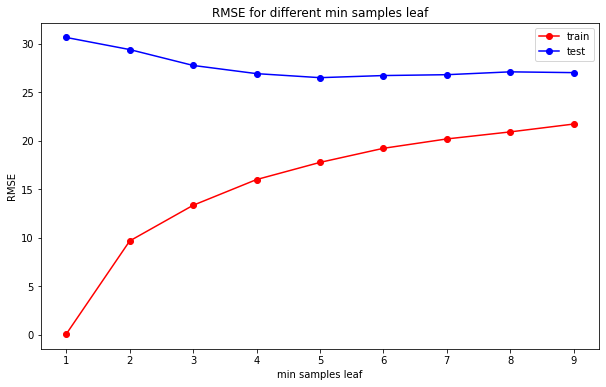

In [ ]:
# plot
x_min_sample = min_samples_leafs
y_train_sample = train_best_min_samples_leafs
y_test_sample = best_min_samples_leaf

plt.subplots(figsize=(10,6))
plt.plot(x_min_sample, y_train_sample, 'ro-', label = 'train')
plt.plot(x_min_sample, y_test_sample, 'bo-', label = 'test')
plt.legend()
plt.xlabel("min samples leaf")
plt.ylabel("RMSE")
plt.title("RMSE for different min samples leaf")
plt.show()

### Build regression decision tree for non-subscribed using the paramters of subscribed

In [ ]:
Nonsub_best_min_samples_leafs = []
for t in min_samples_leafs:
  DTR_sam = DecisionTreeRegressor(min_samples_leaf = t, random_state=4)
  DTR_sam.fit(train_x_nosub, train_y_nosub)
  DTR_sam_pred = DTR_sam.predict(test_x_nosub)
  sam_rmse = math.sqrt(metrics.mean_squared_error(test_y_nosub, DTR_sam_pred))
  Nonsub_best_min_samples_leafs.append(sam_rmse)
Nonsub_best_min_samples_leafs

[58.82132124287892,
 56.769695584378084,
 54.972575727526674,
 55.306445976932096,
 55.796988729341535,
 57.3742209254061,
 57.618244862707215,
 57.65380890513034,
 58.8563860316985]

# Part 2

## 2.1 Logistic Regression

### Data pre-processing

In [ ]:
# Load data
df = pd.read_csv("Dataset.csv")

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "Subscribed",
                      "Non-subscribed"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather"])
df = pd.concat([df, df2], axis=1)

### Transform the regression problem to classification problem with 5 classes

In [ ]:
print("Minimum value of Total:", min(df['Total']))
print("Maximum value of Total:", max(df['Total']))
print("Value range in each class:", max(df['Total'])/5)

Minimum value of Total: 1
Maximum value of Total: 977
Value range in each class: 195.4


In [ ]:
# Convert the numerical target into categorical target with 5 categories.
labels = ['class1', 'class2', 'class3', 'class4', 'class5']
transformer = FunctionTransformer(pd.cut,
              kw_args={'bins': 5, 'labels': labels, 'retbins': False})
targets = df['Total'].values
targets_transformed = transformer.fit_transform(targets)

In [ ]:
df['Total class'] = targets_transformed
df = df.drop(['Total'], axis=1)

In [ ]:
df.groupby(['Total class']).count()

,year,hour,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
Total class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
class1,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677,10677
class2,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319,4319
class3,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650
class4,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557
class5,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176


In [ ]:
df['Total class'].count()

17379

### One-vs-one method

In [ ]:
# Features.
X = df.drop(['Total class'], axis=1).values
# Target.
y = df['Total class'].values

# Split the data set into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
# Classifier.
clf = OneVsOneClassifier(LogisticRegression(random_state=0, solver='liblinear'))
# Fit classifier.
clf.fit(X_train, y_train)
# Score on the training set and test set.
print("Performance on the training set:", clf.score(X_train, y_train))
print("Performance on the test set:", clf.score(X_test, y_test))

Performance on the training set: 0.6839293053842992
Performance on the test set: 0.6802838511699271


### One-vs-all method

In [ ]:
# Features.
X = df.drop(['Total class'], axis=1).values
# Target.
y = df['Total class'].values

# Split the data set into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
# Classifier.
clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='liblinear'))
# Fit classifier.
clf.fit(X_train, y_train)
# Score on the training set and test set.
print("Performance on the training set:", clf.score(X_train, y_train))
print("Performance on the test set:", clf.score(X_test, y_test))

Performance on the training set: 0.6748869708179203
Performance on the test set: 0.6718450326045263


## 2.2 Perceptron Method

### Data pre-processing

In [ ]:
# Load data
df = pd.read_csv("Dataset.csv")

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "year", "Subscribed",
                      "Non-subscribed", "Total"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday"])
df = pd.concat([df, df2], axis=1)

### Feature selection

In [ ]:
# Original features.
X = df.drop(['weather'], axis=1).values
# Target
y = df['weather'].values

# Feature selection.
clf = ExtraTreesClassifier()
clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

In [ ]:
X_new

array([[ 0.    ,  3.28  ,  3.0014, 81.    ,  0.    ],
       [ 1.    ,  2.34  ,  1.9982, 80.    ,  0.    ],
       [ 2.    ,  2.34  ,  1.9982, 80.    ,  0.    ],
       ...,
       [21.    ,  4.22  ,  1.0016, 60.    , 11.0014],
       [22.    ,  4.22  ,  1.9982, 56.    ,  8.9981],
       [23.    ,  4.22  ,  1.9982, 65.    ,  8.9981]])

### One-vs-one method and perceptron model

In [ ]:
# Split the data set into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3,
                                                    random_state=0)
# Classifier.
clf = OneVsOneClassifier(Perceptron(random_state=0))
# Fit classifier.
clf.fit(X_train, y_train)
# Score on the training set and test set.
print("Performance on the training set:", clf.score(X_train, y_train))
print("Performance on the test set:", clf.score(X_test, y_test))

Performance on the training set: 0.6634607480476777
Performance on the test set: 0.6409666283084005


### Impact of learning rate on the train and test error

In [ ]:
# Class labels.
df['weather'].unique()

array(['Clear or partly cloudy', 'Mist', 'Light rain', 'Heavy rain'],
      dtype=object)

In [ ]:
# Number of samples per class label.
print("Number of examples belongs to Clear or partly cloudy:",
      len(df[df['weather'] == 'Clear or partly cloudy']))
print("Number of examples belongs to Mist:",
      len(df[df['weather'] == 'Mist']))
print("Number of examples belongs to Light rain:",
      len(df[df['weather'] == 'Light rain']))
print("Number of examples belongs to Heavy rain:",
      len(df[df['weather'] == 'Heavy rain']))

Number of examples belongs to Clear or partly cloudy: 11413
Number of examples belongs to Mist: 4544
Number of examples belongs to Light rain: 1419
Number of examples belongs to Heavy rain: 3


In [ ]:
# Subtask.
df_subtask = df[(df['weather'] == 'Mist') | (df['weather'] == 'Clear or partly cloudy')]
df_subtask['weather'].unique()

array(['Clear or partly cloudy', 'Mist'], dtype=object)

In [ ]:
# Feature selection for the subtask.
X = df_subtask.drop(['weather'], axis=1).values
y = df_subtask['weather'].values

clf = ExtraTreesClassifier()
clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

In [ ]:
X_new

array([[ 0.    ,  3.28  ,  3.0014, 81.    ,  0.    ],
       [ 1.    ,  2.34  ,  1.9982, 80.    ,  0.    ],
       [ 2.    ,  2.34  ,  1.9982, 80.    ,  0.    ],
       ...,
       [21.    ,  4.22  ,  1.0016, 60.    , 11.0014],
       [22.    ,  4.22  ,  1.9982, 56.    ,  8.9981],
       [23.    ,  4.22  ,  1.9982, 65.    ,  8.9981]])

In [ ]:
# Split the data set into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3,
                                                    random_state=0)
# Dictionaries to save the training and test errors.
training_error = {}
test_error = {}
# Experiment with different learning rates.
for lr in [1, 0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
  # Classifier
  clf = Perceptron(random_state=0, eta0=lr)
  # Fit classifier
  clf.fit(X_train, y_train)
  # Error on the training set and test set
  training_error[lr] = 1 - clf.score(X_train, y_train)
  test_error[lr] = 1 - clf.score(X_test, y_test)

In [ ]:
training_error

{1e-07: 0.3359298057122392,
 1e-06: 0.3359298057122392,
 1e-05: 0.3359298057122392,
 0.0001: 0.3359298057122392,
 0.001: 0.4345062225803563,
 0.1: 0.4345062225803563,
 1: 0.4345062225803563}

In [ ]:
test_error

{1e-07: 0.32539682539682535,
 1e-06: 0.32539682539682535,
 1e-05: 0.32539682539682535,
 0.0001: 0.32539682539682535,
 0.001: 0.42021720969089393,
 0.1: 0.42021720969089393,
 1: 0.42021720969089393}

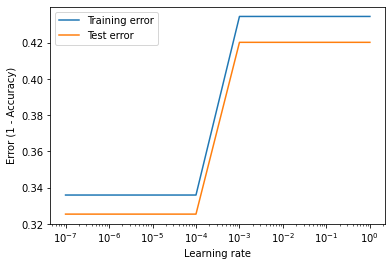

In [ ]:
# Training error per learning rate.
plt.plot(list(training_error.keys()), list(training_error.values()), label="Training error")
# Test error per learning rate.
plt.plot(list(test_error.keys()), list(test_error.values()), label="Test error")
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Error (1 - Accuracy)")
plt.legend()
plt.show()

## 2.3 Outlier Detection

In [ ]:
# Load data
bike_df = pd.read_csv('Dataset.csv')
print("dataset shape: ", bike_df.shape)
bike_df.head(3)

dataset shape:  (17379, 16)


,Unnamed: 0,instant,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
0,0,1,2011-01-01,winter,0,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,1,2,2011-01-01,winter,0,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2,3,2011-01-01,winter,0,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,5,27,32


### Interquartile Range (IQR)

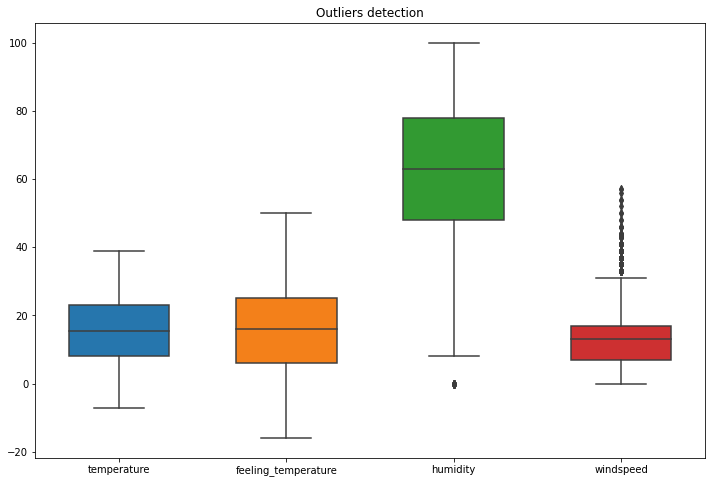

In [ ]:
# Box plot
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(
    data = bike_df[['temperature','feeling_temperature','humidity','windspeed']],
    linewidth = 1.5,
    saturation=0.9,
    width=0.6,
    )
ax.set_title("Outliers detection")
plt.show()

In [ ]:
# Detection and handling of outliers
outliers_features = ['humidity','windspeed']

outliers_indices_list = []

for fea in outliers_features:
    Q1 = np.percentile(bike_df[fea], 25)
    Q3 = np.percentile(bike_df[fea], 75)
    IQR = Q3 -Q1
    Lower_limit = Q1 - 1.5 * IQR
    Upper_limit = Q3 + 1.5 * IQR

    # Outliers count
    outlier_or_not = (bike_df[fea] < Lower_limit)|(bike_df[fea] > Upper_limit)
    Outliers = bike_df.loc[outlier_or_not]
    print("number of outliers of " + fea + ":", Outliers.shape[0])

    # save indices of outliers
    outlier_indices = bike_df[outlier_or_not].index
    outliers_indices_list.extend(outlier_indices)


# drop outliers
bike_df = bike_df.drop(outliers_indices_list, axis=0)
bike_df = bike_df.reset_index(drop=True)
print("Dataset shape after drop outliers: ", bike_df.shape)

number of outliers of humidity: 22
number of outliers of windspeed: 342
Dataset shape after drop outliers:  (17016, 16)


In [ ]:
print("number of all outliers: ", len(set(outliers_indices_list)))

number of all outliers:  363


## 2.4 SVM Regression

### Data pre-processing

In [ ]:
# Load data
df = pd.read_csv("Dataset.csv")

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "Total",
                      "Non-subscribed"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather"])
df = pd.concat([df, df2], axis=1)

### SVM training and evaluation with different kernels using cross-validation

In [ ]:
# Features and target attributes
y = df['Subscribed'].values.reshape(-1,1)
X = df.drop(['Subscribed'], axis=1).values

# Scale feature and target values
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

In [ ]:
# List to store the RMSE and R-squared values
all_rmse_list = []
all_r2_list = []

# K-fold cross validation
kf = KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X)

# Cross validation check the performances of the model
# using different kernels
for train_index, test_index in kf.split(X):
    print("------------------------")
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rmse_list = []
    r2_list = []
    kernels = ['linear', 'poly', 'rbf','sigmoid']
    for kernel in kernels:
      # Define model with the corresponding kernel
      svr = SVR(kernel=kernel)
      # Train model
      svr.fit(X_train, np.ravel(y_train))
      # Make prediction
      pred = svr.predict(X_test)
      # Evaluate the performance on the test set
      rmse = mean_squared_error(y_test, pred, squared=False)
      r2 = r2_score(y_test,pred)
      print("Kernel: " + kernel)
      print("RMSE: " + str(rmse))
      print("R2: " + str(r2))
      rmse_list.append(rmse)
      all_rmse_list.append(rmse_list)
      r2_list.append(r2)
      all_r2_list.append(r2_list)

------------------------
TRAIN: [ 3476  3477  3478 ... 17376 17377 17378] TEST: [   0    1    2 ... 3473 3474 3475]
Kernel: linear
RMSE: 0.5549946041182366
R2: 0.32960865998565814
Kernel: poly
RMSE: 0.5890875676607168
R2: 0.24471547137055083
Kernel: rbf
RMSE: 0.36861308766711265
R2: 0.7042720479731095
Kernel: sigmoid
RMSE: 12.560032296830117
R2: -342.34631156926747
------------------------
TRAIN: [    0     1     2 ... 17376 17377 17378] TEST: [3476 3477 3478 ... 6949 6950 6951]
Kernel: linear
RMSE: 0.7195466060235447
R2: 0.36491762660850935
Kernel: poly
RMSE: 0.8352992010474377
R2: 0.1441526050632812
Kernel: rbf
RMSE: 0.5658531018793411
R2: 0.6072469168916719
Kernel: sigmoid
RMSE: 9.5770373666612
R2: -111.50571003429182
------------------------
TRAIN: [    0     1     2 ... 17376 17377 17378] TEST: [ 6952  6953  6954 ... 10425 10426 10427]
Kernel: linear
RMSE: 0.46710085371443194
R2: 0.2503753695713392
Kernel: poly
RMSE: 0.5590967812031364
R2: -0.07398078077099357
Kernel: rbf
RMSE: 0.

## 2.5 PCA

### Data pre-processing

In [ ]:
# Load data
df = pd.read_csv("Dataset.csv")

# Target attribute
Y = df[["Total"]]
y = Y.to_numpy()

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "Non-subscribed",
                      "Total", "Subscribed"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather", "year"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather", "year"])

# Standardize numerical features
df_ = StandardScaler().fit_transform(df)
df_ = pd.DataFrame(df_, columns=df.columns)

df_ = pd.concat([df_, df2], axis=1)

In [ ]:
df_.columns

Index(['hour', 'temperature', 'feeling_temperature', 'humidity', 'windspeed',
       'year', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Fri', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weather_Clear or partly cloudy', 'weather_Heavy rain',
       'weather_Light rain', 'weather_Mist'],
      dtype='object')

### PCA with original features

In [ ]:
# Function for plotting the PCA visualizations
def plot_visualization(pca, y, title):
  plt.scatter(pca[:, 0], pca[:, 1], s=5, c=y, edgecolor='none',
            cmap=plt.cm.get_cmap('Spectral', 100))
  plt.gca().set_aspect('equal', 'datalim')
  plt.colorbar()
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(title)
  plt.plot()

Explained variance ratio: [0.27302856 0.18119887]


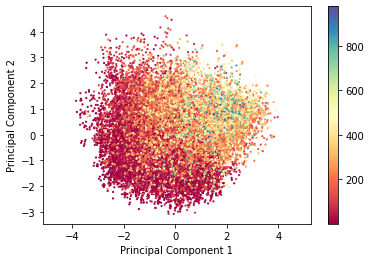

In [ ]:
# PCA with all features
pca = PCA(n_components=2).fit(df_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(df_)

# Plot the PCA components
title = ""
plot_visualization(pca, y, title)

### Remove some features and check the PCA

#### Remove hour

Explained variance ratio: [0.30632035 0.18396088]


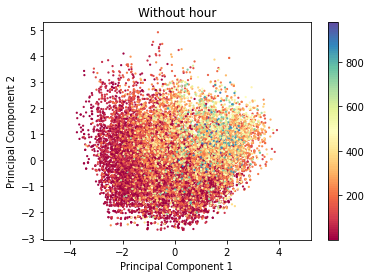

In [ ]:
dfnew = df_.drop(columns=['hour'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without hour"
plot_visualization(pca, y, title)

#### Remove temperature and feeling temperature

Explained variance ratio: [0.24091946 0.13890098]


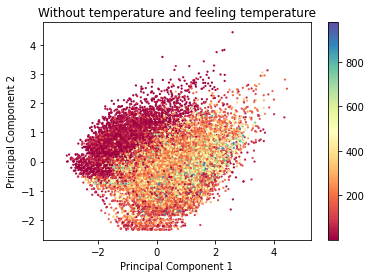

In [ ]:
dfnew = df_.drop(columns=['temperature', 'feeling_temperature'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without temperature and feeling temperature"
plot_visualization(pca, y, title)

#### Remove windspeed and humidity

Explained variance ratio: [0.35811574 0.15624934]


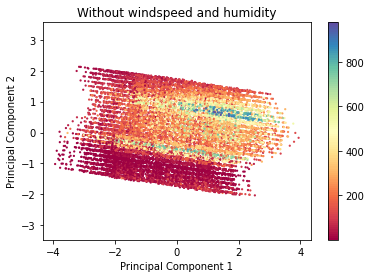

In [ ]:
dfnew = df_.drop(columns=['windspeed', 'humidity'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without windspeed and humidity"
plot_visualization(pca, y, title)

#### Remove binary features of season

Explained variance ratio: [0.28037629 0.19657232]


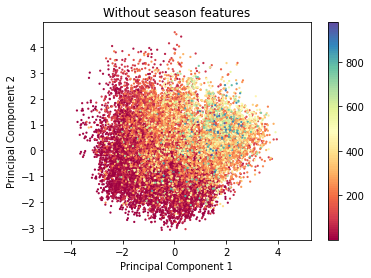

In [ ]:
dfnew = df_.drop(columns=['season_fall', 'season_spring', 'season_summer',
                          'season_winter'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without season features"
plot_visualization(pca, y, title)

#### Remove binary features of month

Explained variance ratio: [0.29879323 0.20264201]


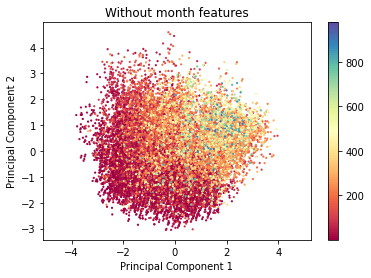

In [ ]:
dfnew = df_.drop(columns=['month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without month features"
plot_visualization(pca, y, title)

#### Remove binary features of weekday

Explained variance ratio: [0.30456395 0.20211831]


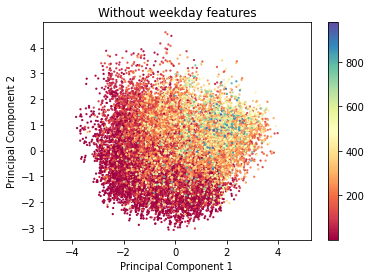

In [ ]:
dfnew = df_.drop(columns=['weekday_Fri', 'weekday_Mon', 'weekday_Sat',
                          'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
                          'weekday_Wed'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without weekday features"
plot_visualization(pca, y, title)

#### Remove binary features of weather

Explained variance ratio: [0.28951619 0.19018457]


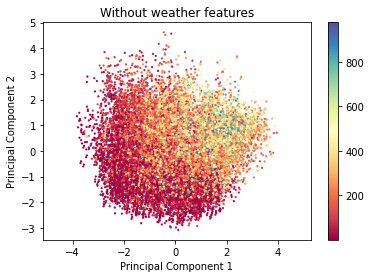

In [ ]:
dfnew = df_.drop(columns=['weather_Clear or partly cloudy',
                          'weather_Heavy rain', 'weather_Light rain',
                          'weather_Mist'])
pca = PCA(n_components=2).fit(dfnew)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(dfnew)

# Plot the PCA components
title = "Without weather features"
plot_visualization(pca, y, title)

#### Remove all non-binary features

Explained variance ratio: [0.13267998 0.10778577]


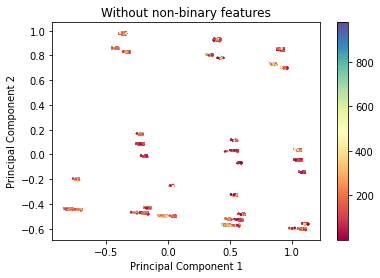

In [ ]:
df_binary = df_.drop(columns=['year', 'hour', 'temperature',
                              'feeling_temperature', 'humidity', 'windspeed'])
pca = PCA(n_components=2).fit(df_binary)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(df_binary)

# Plot the PCA components
title = "Without non-binary features"
plot_visualization(pca, y, title)

#### Remove all binary features

Explained variance ratio: [0.40849888 0.2898811 ]


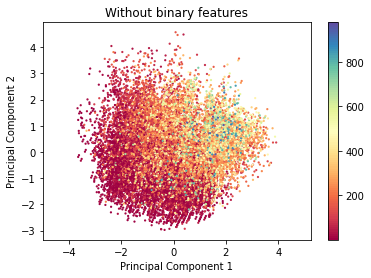

In [ ]:
df_nb = df_[['hour', 'temperature', 'feeling_temperature', 'humidity',
             'windspeed']]
pca = PCA(n_components=2).fit(df_nb)
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca = pca.transform(df_nb)

# Plot the PCA components
title = "Without binary features"
plot_visualization(pca, y, title)

## 2.6 PCA with Hierarchical Clustering

### Data pre-processing

In [ ]:
# Note the data is based on the bike dataframe (bike_df) obtained from
# 2.3 Outlier Detection
features_df = bike_df.iloc[:, 3:-3]
# To get dummy variables to encode the categorical features to numeric
category_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather']
features_df = pd.get_dummies(features_df, columns=category_features)
print("the shape of features after encode: ", features_df.shape)
features_df.head(3)

the shape of features after encode:  (17016, 57)


,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,year_0,year_1,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
0,3.28,3.0014,81.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2.34,1.9982,80.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,2.34,1.9982,80.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
# Normalize the numerical features
numeric_features = ['temperature', 'feeling_temperature','humidity','windspeed']
features_norm_df = features_df.copy()
for fea in numeric_features:
  features_norm_df[fea] = whiten(features_norm_df[fea])
features_norm_df.sample(3)

,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,year_0,year_1,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
5870,2.955873,2.473180,2.677266,2.531864,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1017,0.880801,0.353107,1.784844,2.664885,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
12139,2.852119,2.384577,1.784844,1.998887,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
features_norm_df.describe()

,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,year_0,year_1,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.00000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,1.701672,1.368542,3.312252,1.632092,0.246063,0.253996,0.262106,0.237835,0.497003,0.502997,0.081453,0.085860,0.08539,0.074401,0.081629,0.086918,0.083803,0.082569,0.086683,0.083627,0.083803,0.083862,0.042372,0.042196,0.041608,0.040491,0.040374,0.041784,0.042254,0.042607,0.041961,0.041725,0.041725,0.041902,0.041020,0.041549,0.041255,0.041138,0.041667,0.041373,0.041314,0.041784,0.041667,0.041902,0.041961,0.042372,0.143101,0.142572,0.143630,0.144687,0.141573,0.141455,0.142983,0.657264,0.000176,0.079220,0.263340
std,1.000029,1.000029,1.000029,1.000029,0.430728,0.435308,0.439793,0.425770,0.500006,0.500006,0.273537,0.280166,0.27947,0.262429,0.273807,0.281723,0.277101,0.275238,0.281378,0.276836,0.277101,0.277189,0.201442,0.201041,0.199697,0.197114,0.196840,0.200102,0.201175,0.201975,0.200505,0.199967,0.199967,0.200371,0.198343,0.199562,0.198886,0.198615,0.199832,0.199157,0.199021,0.200102,0.199832,0.200371,0.200505,0.201442,0.350186,0.349646,0.350724,0.351796,0.348622,0.348501,0.350066,0.474638,0.013277,0.270089,0.440458
min,-0.779255,-1.413135,0.419963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.880801,0.529731,2.519780,0.932933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.710830,1.412852,3.333459,1.465910,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.540858,2.207952,4.147138,2.264929,0.000000,1.000000,1.000000,0.000000,1.00000

### Hierarchical Clustering --> PCA

In [ ]:
# Calculate distance matrix of all features
distance_between_clusters = linkage(features_norm_df, method = 'ward', metric = 'euclidean')
print("shape of distance matrix: ", distance_between_clusters.shape)

shape of distance matrix:  (17015, 4)


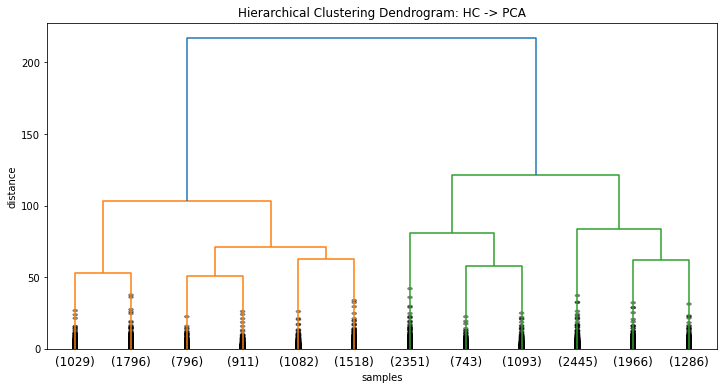

In [ ]:
# Create a dendrogram function for HC -> PCA
plt.figure(figsize =(12,6))
plt.title('Hierarchical Clustering Dendrogram: HC -> PCA')
plt.xlabel('samples')
plt.ylabel('distance')
dn = dendrogram(distance_between_clusters,
                truncate_mode = 'lastp',
                p =12,
                show_contracted = True)
plt.show()

### PCA --> Hierarchical Clustering

In [ ]:
# Calculate distance matrix of features after pca
pca = PCA(n_components = 2, random_state=42)
principal_components = pca.fit_transform(features_norm_df)
pc_df = pd.DataFrame(data=principal_components, columns=['One_Component', 'Two_Component'])
distance_matrix_pca = linkage(principal_components, method = 'ward', metric = 'euclidean')
print("shape of distance matrix pca:", distance_matrix_pca.shape)

shape of distance matrix pca: (17015, 4)


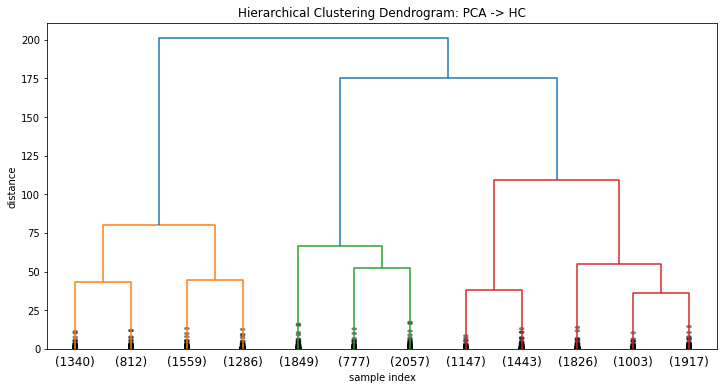

In [ ]:
# Create a dendrogram function for PCA -> HC
plt.figure(figsize =(12,6))
plt.title('Hierarchical Clustering Dendrogram: PCA -> HC')
plt.xlabel('sample index')
plt.ylabel('distance')
dn = dendrogram(distance_matrix_pca,
                truncate_mode = 'lastp',
                p =12,
                show_contracted = True,
                )
plt.show()

### Visualizations

In [ ]:
def visulization(t):

    # Clustering
    cluster_label_HC = fcluster(distance_between_clusters, t=t, criterion='maxclust')
    cluster_label_PCA = fcluster(distance_matrix_pca, t=t, criterion='maxclust')

    # Scatter plot
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
    ax1.scatter(pc_df['One_Component'], pc_df['Two_Component'], c=cluster_label_HC, s=2)
    ax1.set_title('Hierarchical Clustering for all features')

    ax2.scatter(pc_df['One_Component'], pc_df['Two_Component'], c=cluster_label_PCA, s=2)
    ax2.set_title("Hierarchical Clustering for PCA-transformed features")
    plt.show()

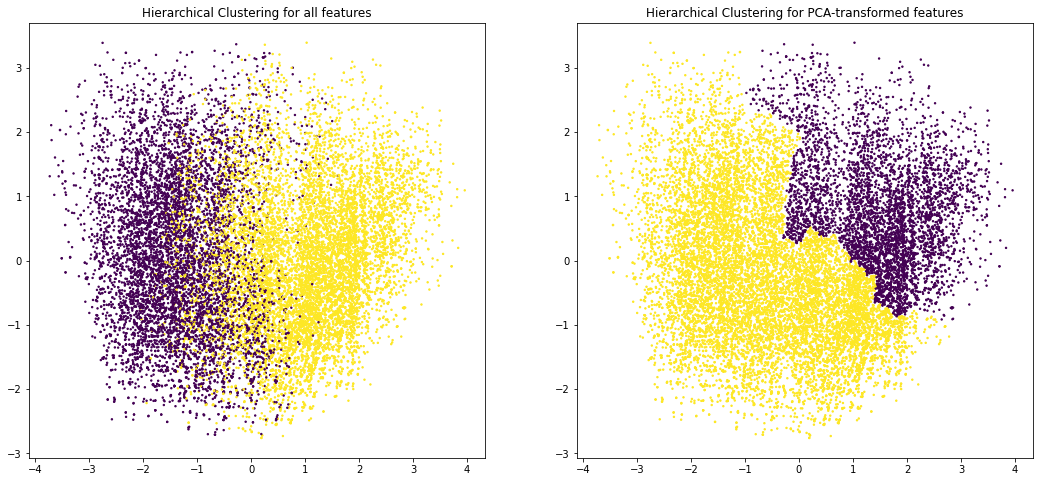

In [ ]:
visulization(2)

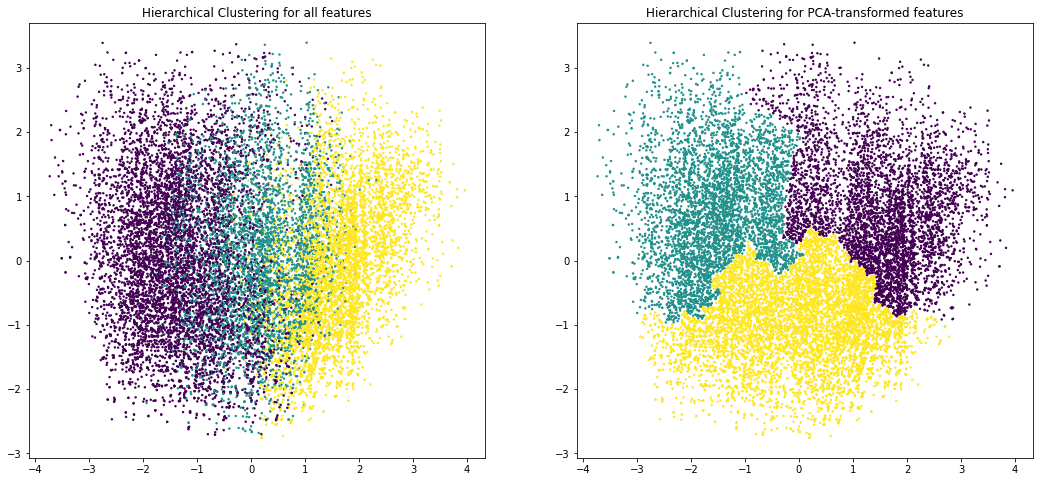

In [ ]:
visulization(3)

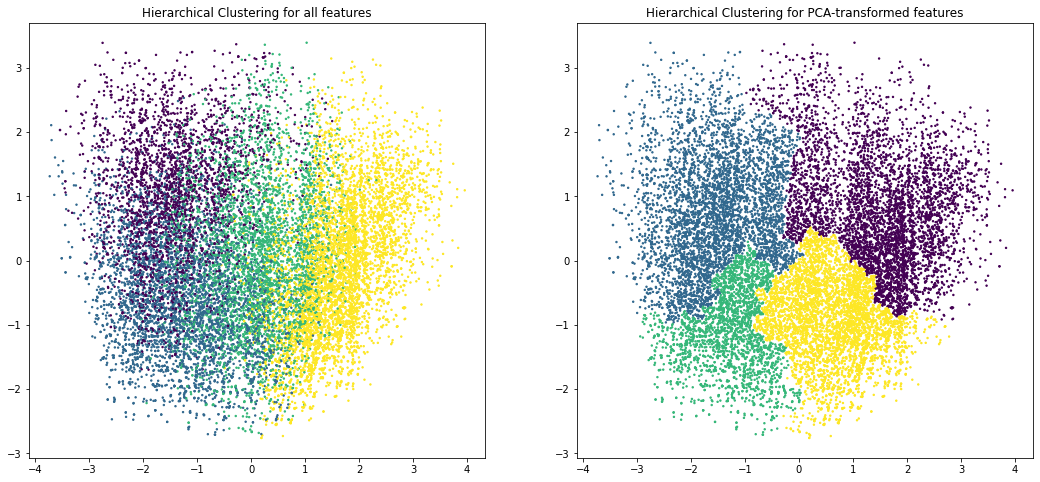

In [ ]:
visulization(4)

## 2.7 Random Forest

In [ ]:
# Note that the data is based on the features dataframe (features_df) obtained
# from 2.6 PCA with Hierachical Clustering

# Double check dataset and tree based algorithms do not require normalisation
print("feature shape:", features_df.shape)
rent_num = bike_df.iloc[:,-1]
print("target length", len(rent_num))

feature shape: (17016, 57)
target length 17016


### Parameter tuning

In [ ]:
# Split data set
X_train,X_test,y_train,y_test = train_test_split(features_df, rent_num,
                                                 test_size=0.2, random_state=42)
print("train X shape:", X_train.shape)
print("train y shape:", y_train.shape)
print("test X shape:", X_test.shape)
print("test y shape:", y_test.shape)

train X shape: (13612, 57)
train y shape: (13612,)
test X shape: (3404, 57)
test y shape: (3404,)


In [ ]:
np.linspace(start = 10, stop = 50, num = 5)

array([10., 20., 30., 40., 50.])

In [ ]:
# Tune the parameters - random search
random_grid = {
   'bootstrap' : [True, False],
   'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)],
   'max_depth' : [int(x) for x in np.linspace(10, 110, 5)],
   'max_features' : np.arange(0.2,1.2,0.2), # [0. , 0.2, 0.4, 0.6, 0.8, 1. ]
   'min_samples_split' : [2,4,6],
   'min_samples_leaf' : [1,3,5]
}

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
parameters_tune = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = random_grid,
    n_iter = 20,
    cv = 5,
    random_state = 22,
    n_jobs = -1,
    scoring = 'r2'
)
parameters_tune.fit(X_train,y_train)
print("best parameters: ", parameters_tune.best_params_)
print("best estimator: ", parameters_tune.best_estimator_)
print("best score:", parameters_tune.best_score_)

best parameters:  {'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 85, 'bootstrap': True}
best estimator:  RandomForestRegressor(max_depth=85, max_features=0.8, n_estimators=30,
                      random_state=42)
best score: 0.8892726766157937


### Comparison between cross-validation score and out-of-bag score

In [ ]:
# Compare cross-validation score with the out-of-bag score
best_model = RandomForestRegressor(
  n_estimators = 30,
  min_samples_split = 2,
  min_samples_leaf = 1,
  max_features = 0.8,
  max_depth = 85,
  bootstrap = True,
  oob_score = True,
  random_state = 42
)

In [ ]:
# Cross validation
cv_5 = cross_validate(
  estimator = best_model,
  X = X_train, y = y_train,
  cv = 5,
  scoring = 'r2'
)
test_score_mean = cv_5['test_score'].mean()
print("mean of test score: ", test_score_mean)

mean of test score:  0.8892726766157937


In [ ]:
# Out-of-bag score (R-squared)
best_model.fit(X_train, y_train)
best_model.oob_score_

0.8907364752698735

In [ ]:
len(best_model.estimators_)

30

### Analysis of the individual trees

In [ ]:
# Analysis of the individual trees
print("max_depth and feature number:", best_model.estimators_[0])
print("node number:", best_model.estimators_[0].tree_.node_count)

max_depth and feature number: DecisionTreeRegressor(max_depth=85, max_features=0.8, random_state=1608637542)
node number: 16481


In [ ]:
# Anaysis of the single decision tree
tree = DecisionTreeRegressor(random_state=42, min_samples_leaf = 5)
tree.fit(X_train, y_train)
print("max_depth: ", tree.tree_.max_depth)
print("max features: ", tree.max_features_)
print("node number: ", tree.tree_.node_count)

max_depth:  37
max features:  57
node number:  4391


## 2.8 Other Method: AdaBoost

### Data pre-processing

In [ ]:
# Load data
df = pd.read_csv("Dataset.csv")

# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "Subscribed",
                      "Non-subscribed"])

# Transform the categorical attributes to binary attributes using
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather"]]
df2 = pd.get_dummies(data=df2)

# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather"])
df = pd.concat([df, df2], axis=1)

### Parameter tuning

In [ ]:
# Features and labels
X = df.drop(['Total'], axis=1).values
y = df['Total'].values

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [ ]:
# Tune the parameters -> random search
parameters={
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth" : [int(x) for x in np.linspace(10, 110, 5)],
    "min_samples_leaf": [1, 3, 5],
    "max_features": np.arange(0.2,1.2,0.2),
    "min_samples_split": [2, 4, 6]
}

# Define base estimator --> Decision Tree Regressor
base_estimator = DecisionTreeRegressor(random_state=0)

# Parameter tuning for Decision Tree Regressor
parameters_tune = RandomizedSearchCV(
    estimator = base_estimator,
    param_distributions = parameters,
    n_iter = 20,
    cv = 5,
    random_state = 0,
    n_jobs = -1,
    scoring = 'neg_root_mean_squared_error'
)
parameters_tune.fit(X_train,y_train)
print("best parameters: ", parameters_tune.best_params_)
print("best estimator: ", parameters_tune.best_estimator_)
print("best score:", parameters_tune.best_score_)

best parameters:  {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 110, 'criterion': 'friedman_mse'}
best estimator:  DecisionTreeRegressor(criterion='friedman_mse', max_depth=110, max_features=1.0,
                      min_samples_leaf=5, min_samples_split=6, random_state=0)
best score: -62.824164409664704


In [ ]:
# Tune the parameters -> random search
parameters = {
    'n_estimators' : [int(x) for x in np.linspace(start=10, stop=100, num=10)],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'loss': ['linear', 'square', 'exponential']
}

# Define base estimator --> Decision Tree Regressor
base_estimator = DecisionTreeRegressor(criterion='friedman_mse', max_depth=110,
                                       max_features=1.0, min_samples_leaf=5,
                                       min_samples_split=6, random_state=0)
# Train the AdaBoost Regressor
reg = AdaBoostRegressor(base_estimator=base_estimator, random_state=0)

# Parameter tuning for AdaBoost Regressor
parameters_tune = RandomizedSearchCV(
    estimator = reg,
    param_distributions = parameters,
    n_iter = 20,
    cv = 5,
    random_state = 0,
    n_jobs = -1,
    scoring = 'neg_root_mean_squared_error'
)
parameters_tune.fit(X_train,y_train)
print("best parameters: ", parameters_tune.best_params_)
print("best estimator: ", parameters_tune.best_estimator_)
print("best score:", parameters_tune.best_score_)

best parameters:  {'n_estimators': 90, 'loss': 'linear', 'learning_rate': 1}
best estimator:  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=110,
                                                       max_features=1.0,
                                                       min_samples_leaf=5,
                                                       min_samples_split=6,
                                                       random_state=0),
                  learning_rate=1, n_estimators=90, random_state=0)
best score: -49.17155608136148


### Model training and evaluation

In [ ]:
# Train the AdaBoost Regressor
reg = AdaBoostRegressor(base_estimator=base_estimator, learning_rate=1,
                        n_estimators=90, random_state=0)

# Fit the model on the training data
reg.fit(X_train, y_train)

# Score on the training set and test set (R-squared)
print("R-squared on the training set:", reg.score(X_train, y_train))
print("R-squared on the test set:", reg.score(X_test, y_test))

R-squared on the training set: 0.9922334692378946
R-squared on the test set: 0.9281874658248518


In [ ]:
# Adjusted R-squared
def adjusted(X, y, model):
  return 1 - (1 - model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Score on the training set and test set (R-squared)
print("Adjusted R-squared on the training set:", adjusted(X_train, y_train, reg))
print("Adjusted R-squared on the test set:", adjusted(X_test, y_test, reg))

Adjusted R-squared on the training set: 0.9922123419182054
Adjusted R-squared on the test set: 0.9277299728465159


In [ ]:
# Prediction on the training data and test data
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# RMSE on the training set and test set
print("RMSE on the training set:", mean_squared_error(y_pred_train, y_train, squared=False))
print("RMSE on the test set:", mean_squared_error(y_pred_test, y_test, squared=False))

RMSE on the training set: 15.970229642923728
RMSE on the test set: 48.70997106388349


In [ ]:
# Ranges of the training data target and test data target
print("Range of the training target values:", np.min(y_train), "-", np.max(y_train))
print("Range of the test target values:", np.min(y_test), "-", np.max(y_test))

Range of the training target values: 1 - 970
Range of the test target values: 1 - 977
